In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import copy
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
# Define the CNN model in PyTorch
class MyCNNModel(nn.Module):
    def __init__(self, no_classes):
        super(MyCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3)) # output shape: 
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, no_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def generate_model(output_dim=100):
    model = MyCNNModel(output_dim)
    return model.to(device)

In [4]:
def visualize_convolutions(layer, show = True, save = False, filename="conv_filter.png"):
    first_layer_weights = layer.weight.data.numpy()
    min_val = first_layer_weights.min(axis=(1, 2, 3), keepdims=True)
    max_val = first_layer_weights.max(axis=(1, 2, 3), keepdims=True)
    first_layer_weights = (first_layer_weights - min_val) / (max_val - min_val)

    grid_size = 8
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

    for i, ax in enumerate(axes.flat):
        if i < 64:
            filter = np.transpose(first_layer_weights[i], (1, 2, 0))
            ax.imshow(filter)
            ax.axis('off')
        else:
            ax.axis('off')
    if show:
        plt.show()
    if save:
        plt.savefig(filename)
    plt.close(fig)

In [5]:
model_1_state_dict = torch.load("models/model_0_1.pt", map_location=torch.device('cpu'))
model_2_state_dict = torch.load("models/model_0_2.pt", map_location=torch.device('cpu'))
model_3_state_dict = torch.load("models/model_0_3.pt", map_location=torch.device('cpu'))
model_4_state_dict = torch.load("models/model_0_4.pt", map_location=torch.device('cpu'))

In [6]:
model1 = generate_model(10)
model1.load_state_dict(model_1_state_dict)
model2 = generate_model(10)
model2.load_state_dict(model_2_state_dict)
model3 = generate_model(10)
model3.load_state_dict(model_3_state_dict)
model4 = generate_model(10)
model4.load_state_dict(model_4_state_dict)

<All keys matched successfully>

In [7]:
models = [model1, model2, model3, model4]
filters_layer_1 = []
filters_layer_2 = []
filters_layer_3 = []
for model in models:
    for i in range(model.conv1.weight.shape[0]):
        filters_layer_1.append(model.conv1.weight[i].detach().numpy())
    for i in range(model.conv2.weight.shape[0]):
        filters_layer_2.append(model.conv2.weight[i].detach().numpy())
    for i in range(model.conv3.weight.shape[0]):
        filters_layer_3.append(model.conv3.weight[i].detach().numpy())
filters_layer_1 = np.array(filters_layer_1)
filters_layer_2 = np.array(filters_layer_2)
filters_layer_3 = np.array(filters_layer_3)

In [8]:
filters_layer_1_flat = []
for i in range(filters_layer_1.shape[0]):
    filters_layer_1_flat.append(filters_layer_1[i].flatten())
filters_layer_1_flat = np.array(filters_layer_1_flat)

In [9]:
### Extract the three input channels first layer
filters_layer_1_ch1 = []
filters_layer_1_ch2 = []
filters_layer_1_ch3 = []
for i in range(filters_layer_1.shape[0]):
    filters_layer_1_ch1.append(filters_layer_1[i][0].flatten())
    filters_layer_1_ch2.append(filters_layer_1[i][1].flatten())
    filters_layer_1_ch3.append(filters_layer_1[i][2].flatten())
filters_layer_1_ch1 = np.array(filters_layer_1_ch1)
filters_layer_1_ch2 = np.array(filters_layer_1_ch2)
filters_layer_1_ch3 = np.array(filters_layer_1_ch3)

In [9]:
filters_layer_1_flat

array([[-0.10136516, -0.3067538 , -0.15042928, ...,  0.13661948,
        -0.08507438,  0.05743688],
       [-0.12917553,  0.0364822 ,  0.1525646 , ..., -0.10334685,
         0.08970889,  0.01373082],
       [ 0.05181279,  0.09067199,  0.05607564, ...,  0.14001645,
        -0.22141938,  0.15965526],
       ...,
       [-0.01084743, -0.16327356,  0.08667644, ..., -0.12480564,
         0.16249762, -0.08210947],
       [ 0.12281477,  0.2543432 , -0.02910583, ..., -0.1755132 ,
        -0.2660602 , -0.3172214 ],
       [ 0.01095   ,  0.13725428,  0.00315775, ...,  0.15380299,
        -0.01186034, -0.23915385]], dtype=float32)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state=0, n_init='auto', max_iter=10).fit(filters_layer_1_flat)


: 

In [119]:
import umap
reducer1 = umap.UMAP()
embedding1 = reducer1.fit_transform(filters_layer_1_ch1)
reducer2 = umap.UMAP()
embedding2 = reducer2.fit_transform(filters_layer_1_ch2)
reducer3 = umap.UMAP()
embedding3 = reducer3.fit_transform(filters_layer_1_ch3)

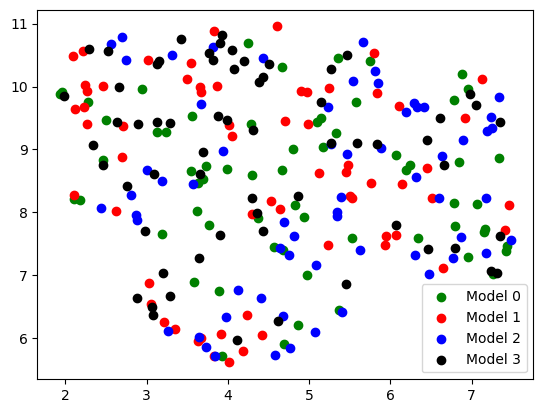

In [123]:
colors = ["green", "red", "blue", "black"] 
for i in range(4):
    plt.scatter(embedding3[64*i:64*(i+1)-1, 0], embedding3[64*i:64*(i+1)-1, 1], color=colors[i],label=f"Model {i}")
plt.legend()

In [67]:
filters_layer_1.shape

(256, 3, 3, 3)

In [70]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(filters_layer_1_flat)

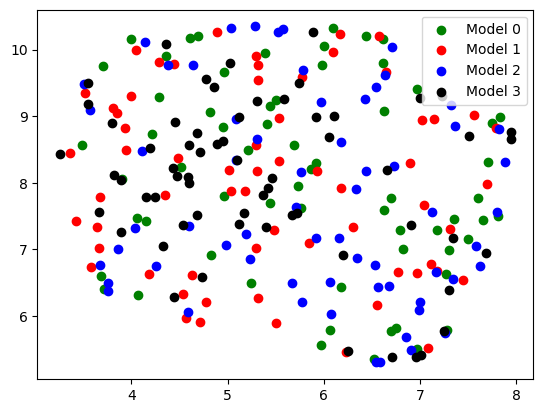

In [80]:
import seaborn as sns
colors = ["green", "red", "blue", "black"] 
for i in range(4):
    plt.scatter(embedding[64*i:64*(i+1)-1, 0], embedding[64*i:64*(i+1)-1, 1], color=colors[i],label=f"Model {i}")
plt.legend()

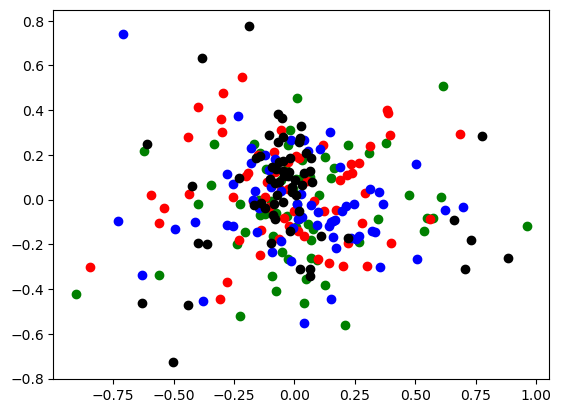

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fil_trans_pca = pca.fit_transform(filters_layer_1_flat)
for i in range(4):
    plt.scatter(fil_trans_pca[64*i:64*(i+1)-1, 0], fil_trans_pca[64*i:64*(i+1)-1, 1], color=colors[i],label=f"Model {i}")

### Comptute euclidean distance between all filters

In [82]:
euc_dist = []
for i in range(filters_layer_1.shape[0]):
    euc_dist.append([])
    for j in range(filters_layer_1.shape[0]):
        euc_dist[i].append(np.linalg.norm(filters_layer_1_flat[i]-filters_layer_1_flat[j]))

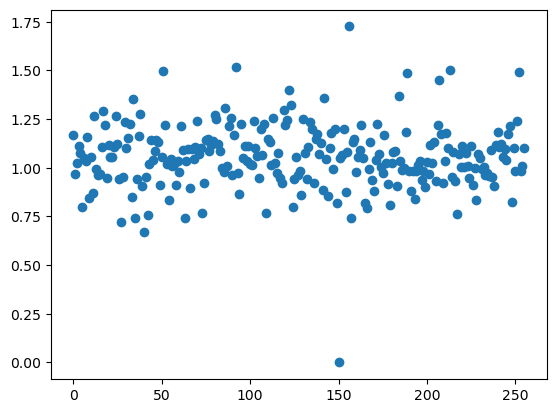

In [106]:
plt.scatter(np.linspace(0,255,256),np.array(euc_dist).T[150])